# Codigos de barras (supply chain)


### Base de datos


Se rellena una base de datos de MongoDB con datos guardados en csv.

In [1]:
# librerias

import pandas as pd
import pymongo

import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('../data/shoes.csv')

df.head()

,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean,...,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,weight
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,NaN,Naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,"Silver,Cream Watercolor Floral",NaN,NaN,...,Overstock.com,NaN,NaN,NaN,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311,NaN
1,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Walmart.com,NaN,NaN,Standard,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...","Shoes,Shoes",Black,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903,NaN
4,AVphGKLPilAPnD_x1Nrm,2017-01-27T01:25:56Z,2018-01-18T03:55:18Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,Grey,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Walmart.com,NaN,NaN,Expedited,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045958,NaN


In [3]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'asins', 'brand', 'categories',
       'primaryCategories', 'colors', 'dimension', 'ean', 'imageURLs', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'prices.amountMax',
       'prices.amountMin', 'prices.availability', 'prices.color',
       'prices.condition', 'prices.currency', 'prices.dateAdded',
       'prices.dateSeen', 'prices.isSale', 'prices.merchant', 'prices.offer',
       'prices.returnPolicy', 'prices.shipping', 'prices.size',
       'prices.sourceURLs', 'sizes', 'sourceURLs', 'upc', 'weight'],
      dtype='object')

In [4]:
# seleccion de datos

df=df[['brand', 'colors', 'sizes', 'prices.amountMax', 'imageURLs', 'ean', 'upc']]
df.head()

,brand,colors,sizes,prices.amountMax,imageURLs,ean,upc
0,Naturalizer,"Silver,Cream Watercolor Floral","6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",55.99,https://i5.walmartimages.com/asr/861ca6cf-fa55...,NaN,017136472311
1,MUK LUKS,Grey,"10,7,6,9,8",47.00,https://i5.walmartimages.com/asr/421de5d5-3a74...,3.397705e+10,033977045743
2,MUK LUKS,Grey,"10,7,6,9,8",35.25,https://i5.walmartimages.com/asr/421de5d5-3a74...,3.397705e+10,033977045743
3,MUK LUKS,Black,"10,7,6,9,8",24.75,https://i5.walmartimages.com/asr/950d38a5-0113...,3.397705e+10,033977045903
4,MUK LUKS,Grey,"10,7,6,9,8",33.00,https://i5.walmartimages.com/asr/5e137bc3-c900...,3.397705e+10,033977045958


In [5]:
# quita nan

df=df.dropna().reset_index()
df.head()

,index,brand,colors,sizes,prices.amountMax,imageURLs,ean,upc
0,1,MUK LUKS,Grey,"10,7,6,9,8",47.00,https://i5.walmartimages.com/asr/421de5d5-3a74...,3.397705e+10,033977045743
1,2,MUK LUKS,Grey,"10,7,6,9,8",35.25,https://i5.walmartimages.com/asr/421de5d5-3a74...,3.397705e+10,033977045743
2,3,MUK LUKS,Black,"10,7,6,9,8",24.75,https://i5.walmartimages.com/asr/950d38a5-0113...,3.397705e+10,033977045903
3,4,MUK LUKS,Grey,"10,7,6,9,8",33.00,https://i5.walmartimages.com/asr/5e137bc3-c900...,3.397705e+10,033977045958
4,5,Soft Ones,Brown Tweed,"5,6.5,9,11",14.00,https://i5.walmartimages.com/asr/7b979ba6-fa0a...,3.397705e+10,033977052222


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             664 non-null    int64  
 1   brand             664 non-null    object 
 2   colors            664 non-null    object 
 3   sizes             664 non-null    object 
 4   prices.amountMax  664 non-null    float64
 5   imageURLs         664 non-null    object 
 6   ean               664 non-null    float64
 7   upc               664 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 41.6+ KB


In [7]:
df=df.drop(columns=['index'])
df.head()

,brand,colors,sizes,prices.amountMax,imageURLs,ean,upc
0,MUK LUKS,Grey,"10,7,6,9,8",47.00,https://i5.walmartimages.com/asr/421de5d5-3a74...,3.397705e+10,033977045743
1,MUK LUKS,Grey,"10,7,6,9,8",35.25,https://i5.walmartimages.com/asr/421de5d5-3a74...,3.397705e+10,033977045743
2,MUK LUKS,Black,"10,7,6,9,8",24.75,https://i5.walmartimages.com/asr/950d38a5-0113...,3.397705e+10,033977045903
3,MUK LUKS,Grey,"10,7,6,9,8",33.00,https://i5.walmartimages.com/asr/5e137bc3-c900...,3.397705e+10,033977045958
4,Soft Ones,Brown Tweed,"5,6.5,9,11",14.00,https://i5.walmartimages.com/asr/7b979ba6-fa0a...,3.397705e+10,033977052222


**limpieza tallas y color de zapato**

In [8]:
df.sizes[0]

'10,7,6,9,8'

In [9]:
df.colors.tail()

659    Turquo,Black,Yellow,Navy,Natural,Coral,Pewter
660    Turquo,Black,Yellow,Navy,Natural,Coral,Pewter
661    Turquo,Black,Yellow,Navy,Natural,Coral,Pewter
662    Turquo,Black,Yellow,Navy,Natural,Coral,Pewter
663    Turquo,Black,Yellow,Navy,Natural,Coral,Pewter
Name: colors, dtype: object

In [10]:
df.sizes=df.sizes.apply(lambda x: x.split(','))
df.colors=df.colors.apply(lambda x: x.split(','))

df.head()

,brand,colors,sizes,prices.amountMax,imageURLs,ean,upc
0,MUK LUKS,[Grey],"[10, 7, 6, 9, 8]",47.00,https://i5.walmartimages.com/asr/421de5d5-3a74...,3.397705e+10,033977045743
1,MUK LUKS,[Grey],"[10, 7, 6, 9, 8]",35.25,https://i5.walmartimages.com/asr/421de5d5-3a74...,3.397705e+10,033977045743
2,MUK LUKS,[Black],"[10, 7, 6, 9, 8]",24.75,https://i5.walmartimages.com/asr/950d38a5-0113...,3.397705e+10,033977045903
3,MUK LUKS,[Grey],"[10, 7, 6, 9, 8]",33.00,https://i5.walmartimages.com/asr/5e137bc3-c900...,3.397705e+10,033977045958
4,Soft Ones,[Brown Tweed],"[5, 6.5, 9, 11]",14.00,https://i5.walmartimages.com/asr/7b979ba6-fa0a...,3.397705e+10,033977052222


In [11]:
# un registro por talla y color

df=df.explode('sizes').reset_index().drop(columns=['index'])
df=df.explode('colors').reset_index().drop(columns=['index'])

df.head()

,brand,colors,sizes,prices.amountMax,imageURLs,ean,upc
0,MUK LUKS,Grey,10,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,3.397705e+10,033977045743
1,MUK LUKS,Grey,7,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,3.397705e+10,033977045743
2,MUK LUKS,Grey,6,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,3.397705e+10,033977045743
3,MUK LUKS,Grey,9,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,3.397705e+10,033977045743
4,MUK LUKS,Grey,8,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,3.397705e+10,033977045743


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             41188 non-null  object 
 1   colors            41188 non-null  object 
 2   sizes             41188 non-null  object 
 3   prices.amountMax  41188 non-null  float64
 4   imageURLs         41188 non-null  object 
 5   ean               41188 non-null  float64
 6   upc               41188 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.2+ MB


**codigos numericos ean**

In [13]:
codigo=pd.read_csv('../data/upc_corpus.csv')
codigo.head(20)

,ean,name
0,725177540363,"Belle and The Yank 1/4"" - 20 TPI x 90mm Hex Dr..."
1,725177540370,"Belle and The Yank 1/4"" - 20 TPI x 120mm Hex D..."
2,797776092321,Eazel Wines 750ml Red Wine Eazel Shiraz 2014
3,701197194311,"IsyLei lilla IsyLei All-In-One, lilla - Cono L..."
4,797776110773,MsConscious 370g Skinny Granola
5,797776110797,MsConscious 370g City Granola
6,797776110803,MsConscious 370g Euphoria Granola
7,797776110780,MsConscious 430g Fitness Junkie Granola
8,701197247475,Wiuep Co 100ml Wiuep Denim Mist 100mL
9,701197247482,Wiuep Co 200mL Wiuep Denim Mist 200mL


In [14]:
codigo=codigo.dropna().reset_index()

In [15]:
codigo.ean

0          725177540363
1          725177540370
2          797776092321
3          701197194311
4          797776110773
               ...     
1045880     52569744970
1045881     52569749616
1045882     52569751183
1045883     52569755860
1045884     52569758373
Name: ean, Length: 1045885, dtype: object

In [16]:
df.ean=codigo.ean.iloc[0:len(df)]

df.head()

,brand,colors,sizes,prices.amountMax,imageURLs,ean,upc
0,MUK LUKS,Grey,10,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,725177540363,033977045743
1,MUK LUKS,Grey,7,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,725177540370,033977045743
2,MUK LUKS,Grey,6,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776092321,033977045743
3,MUK LUKS,Grey,9,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,701197194311,033977045743
4,MUK LUKS,Grey,8,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776110773,033977045743


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             41188 non-null  object 
 1   colors            41188 non-null  object 
 2   sizes             41188 non-null  object 
 3   prices.amountMax  41188 non-null  float64
 4   imageURLs         41188 non-null  object 
 5   ean               41188 non-null  object 
 6   upc               41188 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.2+ MB


In [18]:
# renombrar

df=df.rename(columns={'colors':'color', 'sizes':'size', 'prices.amountMax':'price', 'imageURLs':'url'})
df.head()

,brand,color,size,price,url,ean,upc
0,MUK LUKS,Grey,10,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,725177540363,033977045743
1,MUK LUKS,Grey,7,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,725177540370,033977045743
2,MUK LUKS,Grey,6,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776092321,033977045743
3,MUK LUKS,Grey,9,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,701197194311,033977045743
4,MUK LUKS,Grey,8,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776110773,033977045743


**conexion a MongoDB e insercion de datos**

In [19]:
cliente=pymongo.MongoClient()

db=cliente.supply

In [20]:
db.zapatos.insert_many(df.to_dict('records'))

# Generador de codigos de barras (imagenes)

In [21]:
from barcode import EAN13
from barcode.writer import ImageWriter

In [22]:
df_mongo=pd.DataFrame(list(db.zapatos.find()))
df_mongo.head()

,_id,brand,color,size,price,url,ean,upc
0,5fda4b4d1706ff47feb51d30,MUK LUKS,Grey,10,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,725177540363,033977045743
1,5fda4b4d1706ff47feb51d31,MUK LUKS,Grey,7,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,725177540370,033977045743
2,5fda4b4d1706ff47feb51d32,MUK LUKS,Grey,6,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776092321,033977045743
3,5fda4b4d1706ff47feb51d33,MUK LUKS,Grey,9,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,701197194311,033977045743
4,5fda4b4d1706ff47feb51d34,MUK LUKS,Grey,8,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776110773,033977045743


In [23]:
df_mongo.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82376 entries, 0 to 82375
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   _id     82376 non-null  object 
 1   brand   82376 non-null  object 
 2   color   82376 non-null  object 
 3   size    82376 non-null  object 
 4   price   82376 non-null  float64
 5   url     82376 non-null  object 
 6   ean     82376 non-null  object 
 7   upc     82376 non-null  object 
dtypes: float64(1), object(7)
memory usage: 196.7 MB


In [24]:
# se crean 20 imagenes de codigos de barras

for i in range(20):
    with open(f'../images/barcodes/code_{i}.jpeg', 'wb') as f:
        EAN13(df_mongo.ean[i], writer=ImageWriter()).write(f)

# Proceso de uso:

+ Captura imagen por webcam de un codigo de barras
+ Decodifica codigo de barras
+ Busca el producto en la base de datos
+ Busca productos similares

In [25]:
import cv2
from PIL import Image
from pyzbar.pyzbar import decode

import ast

import requests

import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# captura por camara

def captura():
    cam=cv2.VideoCapture(0)
    while 1:
        ret, frame=cam.read()
        cv2.imshow('Captura', frame)
        
        if ret==False: break
        
        key=cv2.waitKey(1)
        
        if key%256==27: break # tecla ESC
            
        elif key%256==32: # tecla SPACE
            img_name='../images/capturas/codigo.png'
            cv2.imwrite(img_name, frame)
            print('Captura guardada.')
            break
            
    cam.release()
    cv2.destroyAllWindows()
    plt.imshow(plt.imread(img_name));

In [27]:
# decodifica codigo de barras

def decodifica():
    codigo=decode(Image.open('../images/capturas/codigo.png'))[0][0]
    return codigo

In [28]:
# conexion db

def base_datos(colec):
    df=pd.DataFrame(list(colec.find()))
    
    return df

In [29]:
# busqueda elemento en db

def elemento(df, codigo):
    
    elem=df.loc[df.ean==str(ast.literal_eval(codigo.decode('utf8')))[0:-1]]
    
    display(elem)
    
    res=requests.get(elem.url[elem.index[0]], stream=True)
    img=Image.open(res.raw)
    
    plt.imshow(img)
    plt.show();
    
    return elem

In [30]:
# busqueda de elementos similares

def busqueda_similares(df, elem, campo):
    
    productos=df.loc[df[campo]==elem[campo][elem.index[0]]]
    
    return productos

In [31]:
# funcion para fotos de similares

def fotos(productos):
    
    urls=productos.url.tolist()
    
    for e in urls:
        try:
            res=requests.get(e, stream=True)
            img=Image.open(res.raw)

            plt.imshow(img)
            plt.show();
            
        except:
            print('No hay foto.')

**Captura por webcam**

captura() # captura el codigo de barras

**Decodifica y llama a base de datos**

In [34]:
codigo=decodifica()

coleccion=db.zapatos

data=base_datos(coleccion)

**Elemento buscado**

,_id,brand,color,size,price,url,ean,upc
0,5fda4b4d1706ff47feb51d30,MUK LUKS,Grey,10,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,725177540363,033977045743
41188,5fda57af52419f5eda0ca204,MUK LUKS,Grey,10,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,725177540363,033977045743


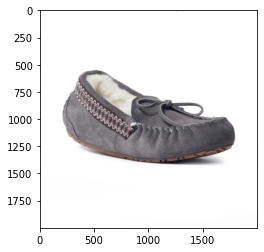

In [35]:
elem=elemento(data, codigo)

**Busqueda elementos similares**

In [37]:
busqueda_similares(data, elem, 'brand').tail()

,_id,brand,color,size,price,url,ean,upc
41507,5fda57af52419f5eda0ca343,MUK LUKS,Grey,11,59.0,https://i5.walmartimages.com/asr/329a817d-1213...,8935101200276,033977166448
41508,5fda57af52419f5eda0ca344,MUK LUKS,Dark Brown,11,59.0,https://i5.walmartimages.com/asr/329a817d-1213...,8935101200313,033977166448
41509,5fda57af52419f5eda0ca345,MUK LUKS,Moccasin,11,59.0,https://i5.walmartimages.com/asr/329a817d-1213...,8935101200320,033977166448
41510,5fda57af52419f5eda0ca346,MUK LUKS,Light Gray,11,59.0,https://i5.walmartimages.com/asr/329a817d-1213...,8935101200429,033977166448
41511,5fda57af52419f5eda0ca347,MUK LUKS,Medium Brown,11,59.0,https://i5.walmartimages.com/asr/329a817d-1213...,8935104613011,033977166448


In [38]:
busqueda_similares(data, elem, 'price').tail()

,_id,brand,color,size,price,url,ean,upc
41188,5fda57af52419f5eda0ca204,MUK LUKS,Grey,10,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,725177540363,033977045743
41189,5fda57af52419f5eda0ca205,MUK LUKS,Grey,7,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,725177540370,033977045743
41190,5fda57af52419f5eda0ca206,MUK LUKS,Grey,6,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776092321,033977045743
41191,5fda57af52419f5eda0ca207,MUK LUKS,Grey,9,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,701197194311,033977045743
41192,5fda57af52419f5eda0ca208,MUK LUKS,Grey,8,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776110773,033977045743


In [39]:
busqueda_similares(data, elem, 'color').tail()

,_id,brand,color,size,price,url,ean,upc
52116,5fda57b052419f5eda0cccb4,journee collection,Grey,7,74.99,https://media.kohlsimg.com/is/image/kohls/2671...,799439066861,"870191628228,870191628310,870191628136,8701916..."
52119,5fda57b052419f5eda0cccb7,journee collection,Grey,7.5,74.99,https://media.kohlsimg.com/is/image/kohls/2671...,58478109053,"870191628228,870191628310,870191628136,8701916..."
52122,5fda57b052419f5eda0cccba,journee collection,Grey,8,74.99,https://media.kohlsimg.com/is/image/kohls/2671...,60915959206,"870191628228,870191628310,870191628136,8701916..."
52125,5fda57b052419f5eda0cccbd,journee collection,Grey,8.5,74.99,https://media.kohlsimg.com/is/image/kohls/2671...,64541649722,"870191628228,870191628310,870191628136,8701916..."
52128,5fda57b052419f5eda0cccc0,journee collection,Grey,9,74.99,https://media.kohlsimg.com/is/image/kohls/2671...,793573169990,"870191628228,870191628310,870191628136,8701916..."


,_id,brand,color,size,price,url,ean,upc
0,5fda4b4d1706ff47feb51d30,MUK LUKS,Grey,10,47.00,https://i5.walmartimages.com/asr/421de5d5-3a74...,725177540363,033977045743
5,5fda4b4d1706ff47feb51d35,MUK LUKS,Grey,10,35.25,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776110797,033977045743
10,5fda4b4d1706ff47feb51d3a,MUK LUKS,Black,10,24.75,https://i5.walmartimages.com/asr/950d38a5-0113...,701197247505,033977045903
15,5fda4b4d1706ff47feb51d3f,MUK LUKS,Grey,10,33.00,https://i5.walmartimages.com/asr/5e137bc3-c900...,797776111084,033977045958
122,5fda4b4d1706ff47feb51daa,MUK LUKS,Navy,10,59.00,https://i5.walmartimages.com/asr/33997517-2082...,797776236541,033977132276


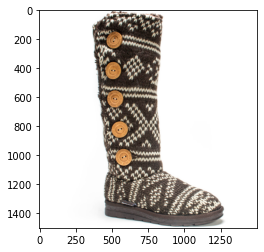

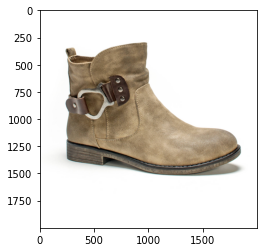

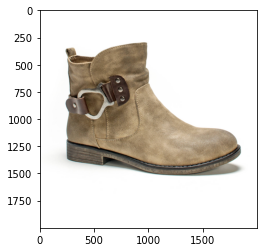

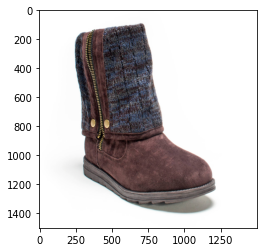

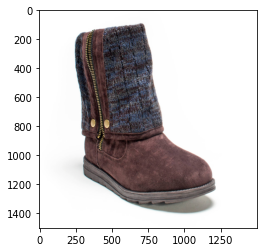

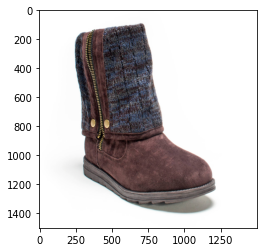

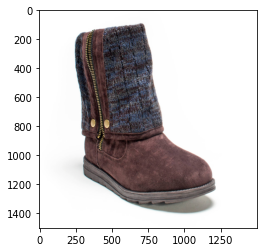

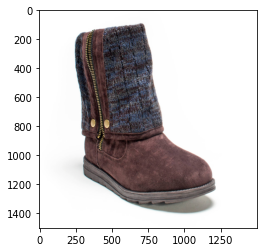

In [40]:
productos=busqueda_similares(data, elem, 'size')

display(productos.head())

fotos(productos.iloc[7:15])

# Sql

Primero, cargar datos en base de datos...